# Q.1

In [4]:
import pandas as pd 
import numpy as np 
import tensorflow as tf 
import keras 
import seaborn as sns 
import matplotlib.pyplot as plt 

print(f'tensor version {tf.__version__}')
print(f'keras version {keras.__version__}')

tensor version 2.17.0
keras version 3.4.1


In [5]:
!pip install tensorflow
!pip install keras

# Q.2

In [6]:
df = pd.read_csv('wine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [7]:
df.shape

(1599, 12)

# Q.3 

In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


# Q.4

In [10]:
X = df.drop('quality',axis=1)
y = df['quality']

In [11]:
y_map = {'bad':0,'good':1}
y = y.map(y_map)

# Q.5

In [12]:

from sklearn.model_selection import train_test_split
x_train,x_temp,y_train,y_temp = train_test_split(X,y,test_size=.3,random_state=42)
x_val,x_test,y_val,y_test = train_test_split(x_temp,y_temp,test_size=.5,random_state=42)

# Q.6

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled= scaler.transform(x_test)

# Q.7

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64,activation = 'relu',input_shape = (x_train.shape[1],)),
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid')
    

    ])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Q.8

In [15]:
model.add(Dense(64,activation = 'relu')),
model.add(Dense(32,activation='relu')),
model.add(Dense(1,activation='sigmoid'))

# Q.9

In [16]:
from tensorflow.keras.callbacks import TensorBoard

tensor_board  = TensorBoard(log_dir="./logs")

# Q.10

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

early_stoping = EarlyStopping(monitor = 'val_loss',patience=3,restore_best_weights=True)

# Q.11

In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint

check_point = ModelCheckpoint(filepath='best_mode.keras',monitor='val_accuracy',save_best_only = True)

# Q.12

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,122 (20.01 KB)

 Trainable params: 5,122 (20.01 KB)

 Non-trainable params: 0 (0.00 B)

# Q.13

In [28]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Q.15

In [29]:
history = model.fit(x_train_scaled,y_train,epochs=10,validation_data = (x_val_scaled,y_val),batch_size = 32,callbacks = [tensor_board,early_stoping,check_point])

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5338 - loss: 0.6899 - val_accuracy: 0.5708 - val_loss: 0.6711
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5465 - loss: 0.6650 - val_accuracy: 0.7000 - val_loss: 0.6297
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7249 - loss: 0.6116 - val_accuracy: 0.6833 - val_loss: 0.5968
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7652 - loss: 0.5593 - val_accuracy: 0.6792 - val_loss: 0.5895
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7497 - loss: 0.5279 - val_accuracy: 0.6583 - val_loss: 0.5861
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7610 - loss: 0.5072 - val_accuracy: 0.6750 - val_loss: 0.5770
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7781 - loss: 0.4831 - val_accuracy: 0.6833 - val_loss: 0.5726
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7905 - loss: 0.4714 - val_accuracy: 0.6792 - val_loss

# Q.16

In [31]:
model.get_weights()

[array([[ 0.04436805,  0.12223002, -0.04142764, -0.26286718, -0.0196603 ,
          0.30398855, -0.22366126, -0.02146187, -0.19990839,  0.03378095,
          0.23393826, -0.04761051,  0.21688162,  0.0755912 ,  0.2282314 ,
         -0.1704383 , -0.02975424, -0.04262805,  0.14273737,  0.24721962,
          0.21139966,  0.19480577, -0.3284575 , -0.03618157,  0.17393601,
         -0.15404032,  0.1889669 , -0.03422814, -0.22091079,  0.02025316,
          0.13218664,  0.08670738, -0.02399378,  0.07468025, -0.2844787 ,
         -0.02709685,  0.21793199, -0.12359817,  0.11903125, -0.14729448,
         -0.34042197,  0.11171588,  0.01231409, -0.1096743 ,  0.1213458 ,
          0.05094447,  0.2192728 ,  0.0931363 ,  0.08426061, -0.06114504,
         -0.25489202,  0.19509123, -0.07685442, -0.12632373,  0.22809541,
         -0.03638024, -0.21819407,  0.10114504,  0.15623549,  0.25932747,
         -0.19009273, -0.23266062, -0.11270463, -0.12622625],
        [ 0.21594296,  0.12729993, -0.15940563, -0

# Q.17

In [32]:
model_frame = pd.DataFrame(history.history)

In [33]:
model_frame

,accuracy,loss,val_accuracy,val_loss
0,0.525469,0.686611,0.570833,0.671053
1,0.573727,0.653536,0.700000,0.629654
2,0.731903,0.598644,0.683333,0.596795
3,0.756032,0.557475,0.679167,0.589463
4,0.752458,0.531611,0.658333,0.586080
5,0.756926,0.510105,0.675000,0.577032
6,0.768543,0.498724,0.683333,0.572618
7,0.778374,0.486798,0.679167,0.585443
8,0.776586,0.487083,0.683333,0.578271
9,0.780161,0.475457,0.687500,0.582896


# Q.18

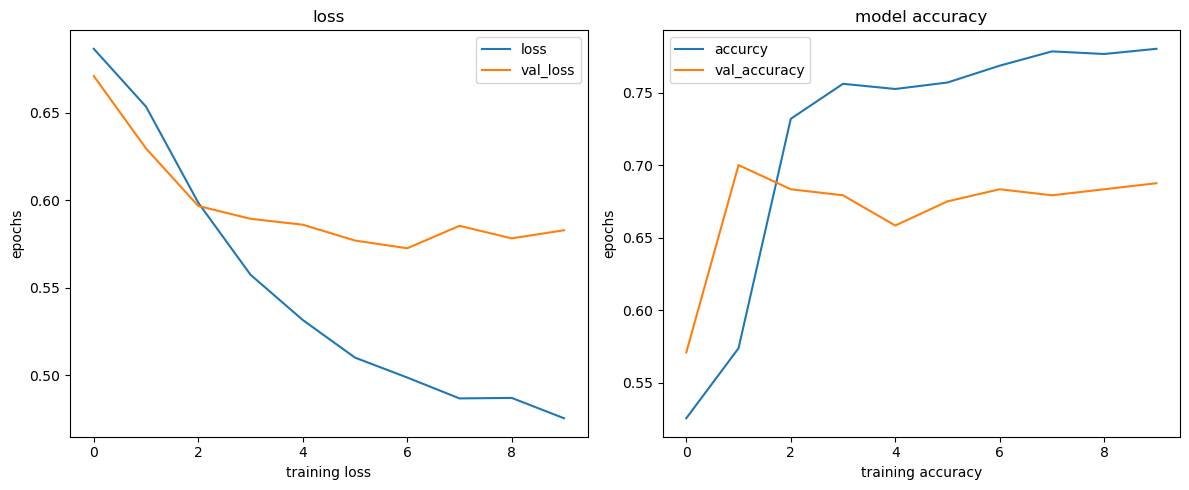

In [36]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.title('loss')
plt.xlabel('training loss')
plt.ylabel('epochs')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label = 'accurcy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title('model accuracy')
plt.xlabel('training accuracy')
plt.ylabel('epochs')
plt.legend()
plt.tight_layout()
plt.show()

# Q.19

In [39]:
test_loss,test_accuracy = model.evaluate(x_test_scaled,y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7242 - loss: 0.5249 


In [40]:
print(f'test loss {test_loss}')
print(f'test accuracy {test accuracy}')

SyntaxError: f-string: invalid syntax. Perhaps you forgot a comma? (1175491419.py, line 2)